In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [419]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [420]:
df = pd.read_excel(files[8])
print(df.columns)
df.columns = ['year', 'people', 'sales']
df.head()

Index(['年', '入場者数（人）', '売上高（百万円）'], dtype='object')


,year,people,sales
0,2000,55928443,298532
1,2001,59224753,363039
2,2002,73263027,446386
3,2003,75357835,427158
4,2004,72640170,410826


In [421]:
df['people_index'] = df['people'] / df.loc[0, 'people'] * 100
df['sales_index'] = df['sales'] / df.loc[0, 'sales'] * 100
df

,year,people,sales,people_index,sales_index
0,2000,55928443,298532,100.000000,100.000000
1,2001,59224753,363039,105.893799,121.608069
2,2002,73263027,446386,130.994219,149.527019
3,2003,75357835,427158,134.739733,143.086168
4,2004,72640170,410826,129.880551,137.615398
5,2005,70832169,405003,126.647847,135.664853
6,2006,71368426,422021,127.606674,141.365415
7,2007,71466160,441710,127.781422,147.960688
8,2008,70244323,456397,125.596779,152.880428
9,2009,66912870,438443,119.640144,146.866333


In [422]:
df['people_increase_rate'] = (df['people'] - df.loc[0, 'people']) / df.loc[0, 'people'] * 100
df['sales_increase_rate'] = (df['sales'] - df.loc[0, 'sales']) / df.loc[0, 'sales'] * 100
df

,year,people,sales,people_index,sales_index,people_increase_rate,sales_increase_rate
0,2000,55928443,298532,100.000000,100.000000,0.000000,0.000000
1,2001,59224753,363039,105.893799,121.608069,5.893799,21.608069
2,2002,73263027,446386,130.994219,149.527019,30.994219,49.527019
3,2003,75357835,427158,134.739733,143.086168,34.739733,43.086168
4,2004,72640170,410826,129.880551,137.615398,29.880551,37.615398
5,2005,70832169,405003,126.647847,135.664853,26.647847,35.664853
6,2006,71368426,422021,127.606674,141.365415,27.606674,41.365415
7,2007,71466160,441710,127.781422,147.960688,27.781422,47.960688
8,2008,70244323,456397,125.596779,152.880428,25.596779,52.880428
9,2009,66912870,438443,119.640144,146.866333,19.640144,46.866333


In [423]:
for i in range(len(df.index)):
    if i == 0:
        tmp = (df.iloc[i, 1] - df.iloc[i, 1]) / df.iloc[i, 1]
    else:
        tmp = (df.iloc[i, 1] - df.iloc[i-1, 1]) / df.iloc[i-1, 1]
    df.loc[i, 'people_growth_rate'] = tmp
df
for i in range(len(df.index)):
    if i == 0:
        tmp = (df.iloc[i, 2] - df.iloc[i, 2]) / df.iloc[i, 2]
    else:
        tmp = (df.iloc[i, 2] - df.iloc[i-1, 2]) / df.iloc[i-1, 2]
    df.loc[i, 'sales_growth_rate'] = tmp
df

,year,people,sales,people_index,sales_index,people_increase_rate,sales_increase_rate,people_growth_rate,sales_growth_rate
0,2000,55928443,298532,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000
1,2001,59224753,363039,105.893799,121.608069,5.893799,21.608069,0.058938,0.216081
2,2002,73263027,446386,130.994219,149.527019,30.994219,49.527019,0.237034,0.229581
3,2003,75357835,427158,134.739733,143.086168,34.739733,43.086168,0.028593,-0.043075
4,2004,72640170,410826,129.880551,137.615398,29.880551,37.615398,-0.036063,-0.038234
5,2005,70832169,405003,126.647847,135.664853,26.647847,35.664853,-0.024890,-0.014174
6,2006,71368426,422021,127.606674,141.365415,27.606674,41.365415,0.007571,0.042019
7,2007,71466160,441710,127.781422,147.960688,27.781422,47.960688,0.001369,0.046654
8,2008,70244323,456397,125.596779,152.880428,25.596779,52.880428,-0.017097,0.033250
9,2009,66912870,438443,119.640144,146.866333,19.640144,46.866333,-0.047427,-0.039339


In [424]:
df.head(3)

,year,people,sales,people_index,sales_index,people_increase_rate,sales_increase_rate,people_growth_rate,sales_growth_rate
0,2000,55928443,298532,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000
1,2001,59224753,363039,105.893799,121.608069,5.893799,21.608069,0.058938,0.216081
2,2002,73263027,446386,130.994219,149.527019,30.994219,49.527019,0.237034,0.229581


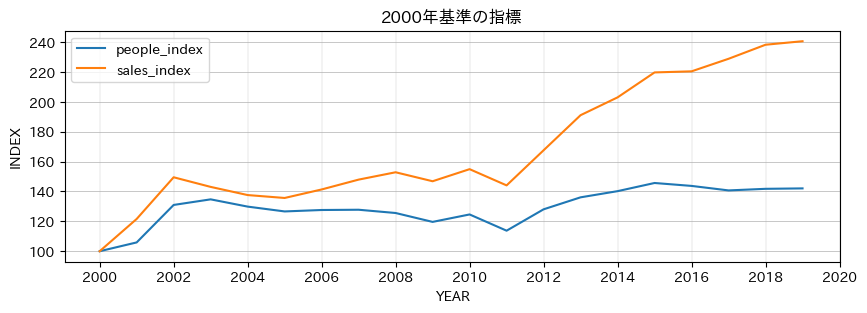

In [425]:
plt.figure(figsize=(10, 3))
plt.plot(df['year'], df['people_index'], label='people_index')
plt.plot(df['year'], df['sales_index'], label='sales_index')
plt.xticks(np.arange(2000, 2021, 2))
plt.title('2000年基準の指標')
plt.xlabel('YEAR')
plt.ylabel('INDEX')
plt.grid(axis='x', linewidth=0.2)
plt.grid(axis='y', linewidth=0.5)
plt.legend()
plt.show()

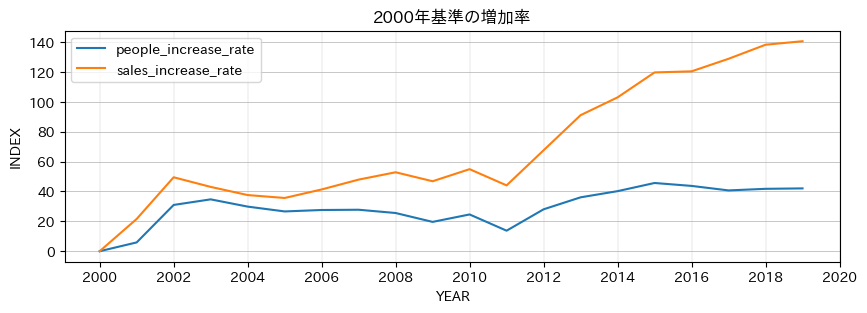

In [426]:
plt.figure(figsize=(10, 3))
plt.plot(df['year'], df['people_increase_rate'], label='people_increase_rate')
plt.plot(df['year'], df['sales_increase_rate'], label='sales_increase_rate')
plt.xticks(np.arange(2000, 2021, 2))
plt.title('2000年基準の増加率')
plt.xlabel('YEAR')
plt.ylabel('INDEX')
plt.grid(axis='x', linewidth=0.2)
plt.grid(axis='y', linewidth=0.5)
plt.legend()
plt.show()

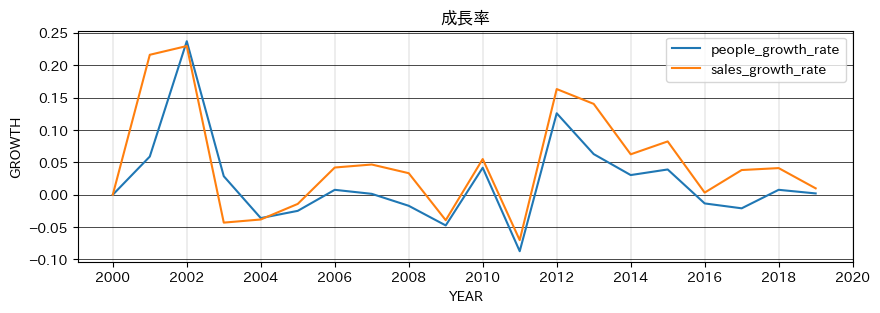

In [427]:
plt.figure(figsize=(10, 3))
plt.plot(df['year'], df['people_growth_rate'], label='people_growth_rate')
plt.plot(df['year'], df['sales_growth_rate'], label='sales_growth_rate')
plt.xticks(np.arange(2000, 2021, 2))
plt.title('成長率')
plt.xlabel('YEAR')
plt.ylabel('GROWTH')
plt.grid(axis='x', linewidth=0.1, color='k', linestyle='-',)
plt.grid(axis='y', linewidth=0.5, color='k', linestyle='-',)
plt.legend()
plt.show()

In [428]:
df = pd.read_excel(files[9], index_col=0, header=1)
print(df.columns)
df.columns = ["total", "shopA", "shopB", "shopC"]
df.index = [f'20{17+i}q{j+1}' for i in range(4) for j in range(4)][:-3]
df.info()
df.head()

Index(['合計', '店舗A', '店舗B', '店舗C'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 2017q1 to 2020q1
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   total   13 non-null     int64
 1   shopA   13 non-null     int64
 2   shopB   13 non-null     int64
 3   shopC   13 non-null     int64
dtypes: int64(4)
memory usage: 520.0+ bytes


,total,shopA,shopB,shopC
2017q1,807,533,216,58
2017q2,799,546,198,55
2017q3,788,521,208,59
2017q4,1102,735,300,67
2018q1,849,571,224,53


販売額推移

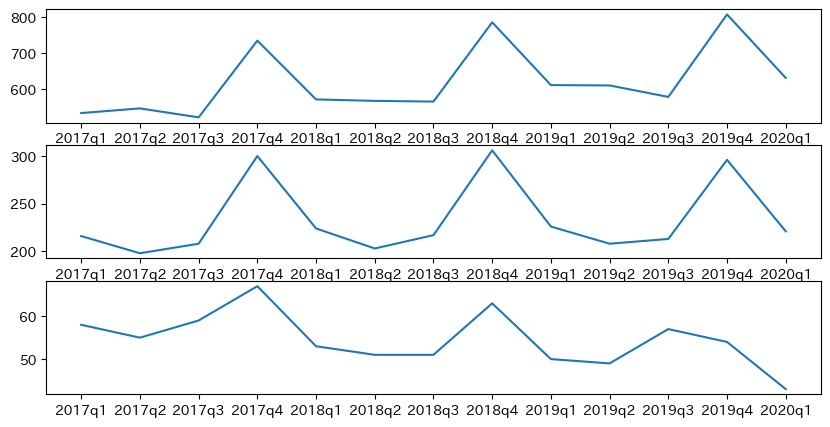

In [429]:
fig, axs = plt.subplots(3, 1, figsize=(10, 5))
for ax, shop in zip(axs, ["shopA", "shopB", "shopC"]):
    ax.plot(df.index, df[shop])

販売額トレンド把握

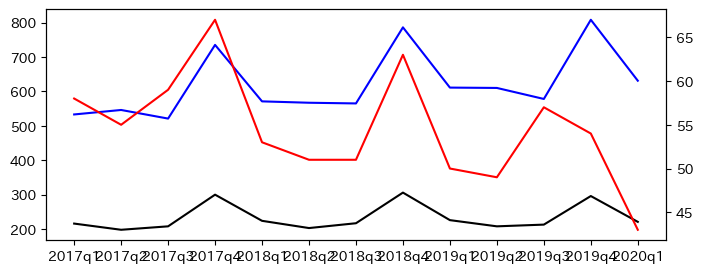

In [430]:
# そのまま
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(df.index, df[['shopA']], color='b')
ax.plot(df.index, df[['shopB']], color='k')
ax2 = ax.twinx()
ax2.plot(df.index, df[['shopC']], color='r')

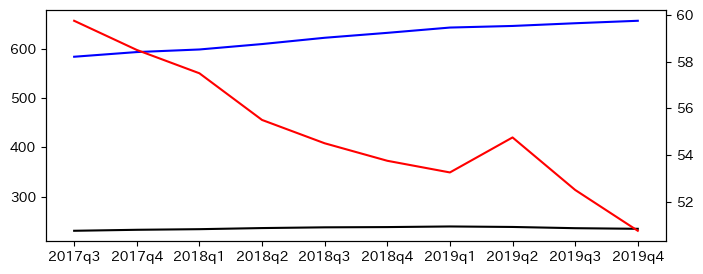

In [431]:
# 4か月移動平均
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(df.index, df[['shopA']].rolling(window=4, min_periods=4, center=True).mean(), color='b')
ax.plot(df.index, df[['shopB']].rolling(window=4, min_periods=4, center=True).mean(), color='k')
ax2 = ax.twinx()
ax2.plot(df.index, df[['shopC']].rolling(window=4, min_periods=4, center=True).mean(), color='r')

中央化移動平均

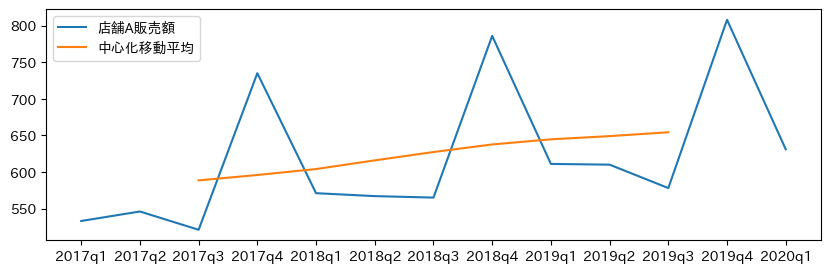

In [432]:
# 17q3を基準とした4か月分の中央移動平均
a = df['shopA'].rolling(window=4, min_periods=4, center=True).mean()
# 17q2を基準とした4か月分の中央移動平均
b = df['shopA'].rolling(window=4).mean().shift(-2)
# 平均の平均をとる
ab = (a + b) * 0.5

plt.figure(figsize=(10, 3))
plt.plot(df.index, df['shopA'], label='店舗A販売額')
plt.plot(df.index, ab, label='中心化移動平均')
plt.legend()
plt.show()

In [444]:
df_rolling1 = df.rolling(window=4, min_periods=4, center=True).mean()
df_rolling2 = df.rolling(window=4, min_periods=4, center=False).mean().shift(-2)
df_rolling = (df_rolling1 + df_rolling2) * 0.5
df_rolling

,total,shopA,shopB,shopC
2017q1,NaN,NaN,NaN,NaN
2017q2,NaN,NaN,NaN,NaN
2017q3,879.250,588.500,231.500,59.125
2017q4,887.375,595.875,233.125,58.000
2018q1,895.875,604.000,234.875,56.500
2018q2,908.125,615.875,236.750,55.000
2018q3,919.500,627.250,237.750,54.125
2018q4,929.875,637.625,238.625,53.500
2019q1,937.375,644.625,238.750,54.000
2019q2,939.625,649.000,237.000,53.625


対前年同期比

In [434]:
df_ratio = pd.DataFrame()
for i, c in enumerate(df.columns):
    tmp = [None] * 4
    for j in range(4, 13):
        tmp.append((df.iloc[j, i] - df.iloc[j-4, i]) / df.iloc[j-4, i])
    df_ratio[f'{c}_ratio'] = tmp
df_ratio.index = df.index
df_ratio.style.format('{:.01%}')

,total_ratio,shopA_ratio,shopB_ratio,shopC_ratio
2017q1,nan%,nan%,nan%,nan%
2017q2,nan%,nan%,nan%,nan%
2017q3,nan%,nan%,nan%,nan%
2017q4,nan%,nan%,nan%,nan%
2018q1,5.2%,7.1%,3.7%,-8.6%
2018q2,2.9%,3.8%,2.5%,-7.3%
2018q3,5.7%,8.4%,4.3%,-13.6%
2018q4,4.8%,6.9%,2.0%,-6.0%
2019q1,4.5%,7.0%,0.9%,-5.7%
2019q2,5.5%,7.6%,2.5%,-3.9%


成長率の寄与度分解

In [435]:
df_cont = pd.DataFrame()
for i, c in enumerate(df.columns):
    tmp = [None] * 4
    for j in range(4, 13):
        tmp.append((df.iloc[j, i] - df.iloc[j-4, i]) / df.iloc[j-4, 0])
    df_cont[f'{c}_cont'] = tmp
df_cont.index = df.index
df_cont.style.format('{:.01%}')

,total_cont,shopA_cont,shopB_cont,shopC_cont
2017q1,nan%,nan%,nan%,nan%
2017q2,nan%,nan%,nan%,nan%
2017q3,nan%,nan%,nan%,nan%
2017q4,nan%,nan%,nan%,nan%
2018q1,5.2%,4.7%,1.0%,-0.6%
2018q2,2.9%,2.6%,0.6%,-0.5%
2018q3,5.7%,5.6%,1.1%,-1.0%
2018q4,4.8%,4.6%,0.5%,-0.4%
2019q1,4.5%,4.7%,0.2%,-0.4%
2019q2,5.5%,5.2%,0.6%,-0.2%


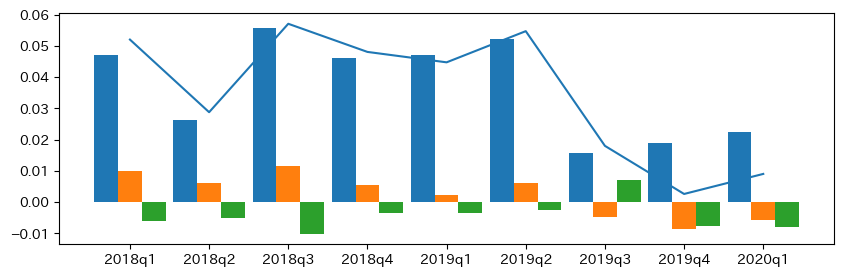

In [436]:
# 棒グラフを3本並べる
x = np.arange(df_cont.shape[0])
labels = df_cont.index
width = 0.3

plt.figure(figsize=(10, 3))
plt.bar(x-width, df_cont['shopA_cont'], width)
plt.bar(x, df_cont['shopB_cont'], width)
plt.bar(x+width, df_cont['shopC_cont'], width)
plt.plot(x, df_cont['total_cont'])

plt.xticks(x[4:], labels[4:])
plt.show()

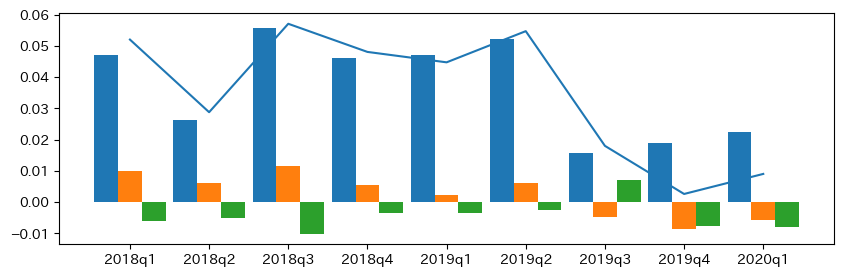

In [447]:
# 棒グラフを3本並べる
x = np.arange(df_cont.shape[0])
labels = df_cont.index
width = 0.3
multiplier = 0

plt.figure(figsize=(10, 3))

for c in df_cont.columns:
    if c == 'total_cont':
        plt.plot(x+width, df_cont[c])
    else:
        offset = width * multiplier
        plt.bar(x+offset, df_cont[c], width)
        multiplier += 1
        
plt.xticks(x[4:]+width, labels[4:])
plt.show()

In [450]:
df_answer = pd.concat([df, df_rolling, df_ratio, df_cont], axis=1)
df_answer

,total,shopA,shopB,shopC,total,shopA,shopB,shopC,total_ratio,shopA_ratio,shopB_ratio,shopC_ratio,total_cont,shopA_cont,shopB_cont,shopC_cont
2017q1,807,533,216,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017q2,799,546,198,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017q3,788,521,208,59,879.250,588.500,231.500,59.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017q4,1102,735,300,67,887.375,595.875,233.125,58.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018q1,849,571,224,53,895.875,604.000,234.875,56.500,0.052045,0.071295,0.037037,-0.086207,0.052045,0.047088,0.009913,-0.006196
2018q2,822,567,203,51,908.125,615.875,236.750,55.000,0.028786,0.038462,0.025253,-0.072727,0.028786,0.026283,0.006258,-0.005006
2018q3,833,565,217,51,919.500,627.250,237.750,54.125,0.057107,0.084453,0.043269,-0.135593,0.057107,0.055838,0.011421,-0.010152
2018q4,1155,786,306,63,929.875,637.625,238.625,53.500,0.048094,0.069388,0.020000,-0.059701,0.048094,0.046279,0.005445,-0.003630
2019q1,887,611,226,50,937.375,644.625,238.750,54.000,0.044759,0.070053,0.008929,-0.056604,0.044759,0.047114,0.002356,-0.003534
2019q2,867,610,208,49,939.625,649.000,237.000,53.625,0.054745,0.075838,0.024631,-0.039216,0.054745,0.052311,0.006083,-0.002433
